In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.4 backend: tensorflow


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


In [3]:
# Number of hidden units to use:
nb_units = 50

model = Sequential()

# Recurrent layers supported: SimpleRNN, LSTM, GRU:
model.add(SimpleRNN(nb_units,
                    input_shape=(img_rows, img_cols)))

# To stack multiple RNN layers, all RNN layers except the last one need
# to have "return_sequences=True".  An example of using two RNN layers:
#model.add(SimpleRNN(16,
#                    input_shape=(img_rows, img_cols),
#                    return_sequences=True))
#model.add(SimpleRNN(32))

model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________
None


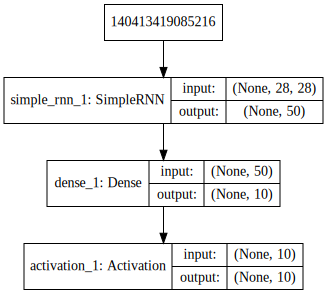

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
%%time

epochs = 50

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 3s - loss: 0.8692 - acc: 0.7263
Epoch 2/50
 - 2s - loss: 0.3848 - acc: 0.8889
Epoch 3/50
 - 2s - loss: 0.2916 - acc: 0.9168
Epoch 4/50
 - 2s - loss: 0.2527 - acc: 0.9281
Epoch 5/50
 - 2s - loss: 0.2263 - acc: 0.9354
Epoch 6/50
 - 2s - loss: 0.2054 - acc: 0.9414
Epoch 7/50
 - 2s - loss: 0.1956 - acc: 0.9445
Epoch 8/50
 - 2s - loss: 0.1847 - acc: 0.9481
Epoch 9/50
 - 3s - loss: 0.1700 - acc: 0.9527
Epoch 10/50
 - 3s - loss: 0.1667 - acc: 0.9523
Epoch 11/50
 - 2s - loss: 0.1547 - acc: 0.9562
Epoch 12/50
 - 3s - loss: 0.1483 - acc: 0.9582
Epoch 13/50
 - 3s - loss: 0.1452 - acc: 0.9581
Epoch 14/50
 - 2s - loss: 0.1372 - acc: 0.9613
Epoch 15/50
 - 3s - loss: 0.1374 - acc: 0.9611
Epoch 16/50
 - 3s - loss: 0.1306 - acc: 0.9626
Epoch 17/50
 - 2s - loss: 0.1264 - acc: 0.9632
Epoch 18/50
 - 3s - loss: 0.1231 - acc: 0.9644
Epoch 19/50
 - 2s - loss: 0.1201 - acc: 0.9657
Epoch 20/50
 - 2s - loss: 0.1164 - acc: 0.9668
Epoch 21/50
 - 2s - l

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');